# 第2章 用scikit-learn估计器分类

* 估计器（Estimator）：用于分类、聚类和回归分析。
* 转换器（Transformer）：用于数据预处理和数据转换。
* 流水线（Pipeline）：组合数据挖掘流程，便于再次使用。

## 2.1 scikit-learn估计器

In [1]:
import os
print(os.path.expanduser("~"))

C:\Users\hasee


In [2]:
import numpy as np
import csv

In [3]:
data_filename = "ionosphere.data"

In [4]:
X = np.zeros((351,34),dtype='float')
y = np.zeros((351,),dtype='bool')

In [5]:
with open(data_filename, 'r') as input_file:
    reader = csv.reader(input_file)
    for i,row in enumerate(reader):
        data = [float(datum) for datum in row[:-1]]
        X[i] = data
        y[i] = row[-1] == 'g'

In [6]:
from sklearn.cross_validation import train_test_split

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=14)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
estimator = KNeighborsClassifier()

In [10]:
estimator.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
y_pred = estimator.predict(X_test)

In [12]:
y_pred

array([ True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
        True, False,  True,  True,  True, False, False,  True, False,
        True,  True, False,  True,  True, False,  True], dtype=bool)

In [13]:
accuracy = np.mean(y_pred==y_test)

In [14]:
accuracy

0.86363636363636365

In [15]:
from sklearn.cross_validation import cross_val_score

In [16]:
scores = cross_val_score(estimator,X,y,scoring='accuracy')

In [20]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.cross_validation:

cross_val_score(estimator, X, y=None, scoring=None, cv=None, n_jobs=1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    Evaluate a score by cross-validation
    
    .. deprecated:: 0.18
        This module will be removed in 0.20.
        Use :func:`sklearn.model_selection.cross_val_score` instead.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like
        The data to fit. Can be, for example a list, or an array at least 2d.
    
    y : array-like, optional, default: None
        The target variable to try to predict in the case of
        supervised learning.
    
    scoring : string, callable or None, optional, default: None
        A string (see model evaluation documentation) or
        a scorer callable object / function with signature
 

In [17]:
scores

array([ 0.82051282,  0.78632479,  0.86324786])

In [18]:
average_accuracy = np.mean(scores) * 100

In [19]:
average_accuracy

82.336182336182333

In [21]:
avg_scores = []
all_scores = []
parameter_values = list(range(1,21))

In [22]:
for n_neighbors in parameter_values:
    estimator = KNeighborsClassifier(n_neighbors=n_neighbors)
    scores = cross_val_score(estimator,X,y,scoring='accuracy')
    avg_scores.append(np.mean(scores))
    all_scores.append(scores)

In [23]:
import matplotlib.pyplot as plt

In [36]:
plt.plot(parameter_values,avg_scores,'-b')

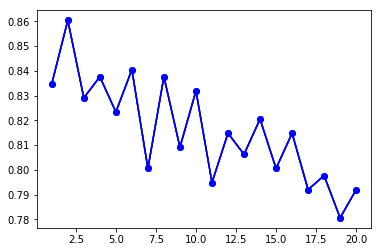

In [37]:
plt.show()

In [39]:
X_broken = np.array(X)

In [40]:
X_broken[:,::2] /= 10

In [43]:
X[0]

array([ 1.     ,  0.     ,  0.99539, -0.05889,  0.85243,  0.02306,
        0.83398, -0.37708,  1.     ,  0.0376 ,  0.85243, -0.17755,
        0.59755, -0.44945,  0.60536, -0.38223,  0.84356, -0.38542,
        0.58212, -0.32192,  0.56971, -0.29674,  0.36946, -0.47357,
        0.56811, -0.51171,  0.41078, -0.46168,  0.21266, -0.3409 ,
        0.42267, -0.54487,  0.18641, -0.453  ])

In [42]:
X_broken[0]

array([ 0.1     ,  0.      ,  0.099539, -0.05889 ,  0.085243,  0.02306 ,
        0.083398, -0.37708 ,  0.1     ,  0.0376  ,  0.085243, -0.17755 ,
        0.059755, -0.44945 ,  0.060536, -0.38223 ,  0.084356, -0.38542 ,
        0.058212, -0.32192 ,  0.056971, -0.29674 ,  0.036946, -0.47357 ,
        0.056811, -0.51171 ,  0.041078, -0.46168 ,  0.021266, -0.3409  ,
        0.042267, -0.54487 ,  0.018641, -0.453   ])

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
X_transformed = MinMaxScaler().fit_transform(X)

In [47]:
X_transformed

array([[ 1.      ,  0.      ,  0.997695, ...,  0.227565,  0.593205,  0.2735  ],
       [ 1.      ,  0.      ,  1.      , ...,  0.46856 ,  0.43131 ,
         0.487765],
       [ 1.      ,  0.      ,  1.      , ...,  0.3791  ,  0.780225,
         0.30881 ],
       ..., 
       [ 1.      ,  0.      ,  0.973505, ...,  0.50221 ,  0.963485,
         0.497115],
       [ 1.      ,  0.      ,  0.95304 , ...,  0.481215,  0.937015,
         0.418785],
       [ 1.      ,  0.      ,  0.92355 , ...,  0.46661 ,  0.92882 ,
         0.469245]])

In [48]:
X_transformed.min(axis=0)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [49]:
X_transformed.max(axis=0)

array([ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])